# КТ-1 по ML | Серкибаев Аким, Э-2209

In [1]:
!pip install mplcyberpunk

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor, Pool
import optuna
from phik import phik_matrix
import mplcyberpunk

plt.style.use("cyberpunk")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

Можете указать ссылку не через каагл, а через локальный файл, чтобы можно было запустить у себя

In [4]:
file_path = "/kaggle/input/kt-1-kaagle/city_united.csv"
df = pd.read_csv(file_path)

## Предобработка данных

In [5]:
df.head()

,UA_Name,UA_Country,UA_Continent,Housing,Cost of Living,Startups,Venture Capital,Travel Connectivity,Commute,Business Freedom,Safety,Healthcare,Education,Environmental Quality,Economy,Taxation,Internet Access,Leisure & Culture,Tolerance,Outdoors,Quality of Life Index
0,Adelaide,Australia,Oceania,6.3095,4.692,3.1365,2.640,1.7765,5.33625,9.399667,7.9260,7.936667,5.1420,8.33075,6.0695,4.5885,4.3410,4.3285,7.8220,5.5310,200.03
1,Raleigh,North Carolina,North America,6.1285,5.610,5.4970,5.157,1.7570,4.78425,8.671000,6.5225,6.677333,7.1165,8.58375,6.5145,4.0620,7.9515,6.6130,7.5620,3.3905,197.30
2,Zurich,Switzerland,Europe,1.4730,1.000,6.2035,3.872,7.7335,5.83950,8.888000,9.0665,7.670333,7.2875,8.64300,6.5520,6.4285,7.2675,4.9655,8.7845,5.4010,194.41
3,Wellington,New Zealand,Oceania,5.1345,5.161,2.4715,1.753,0.8525,6.03975,10.000000,8.2230,8.078333,4.7560,9.60925,5.5055,5.9315,5.1745,4.5990,8.1160,6.3970,193.89
4,Charlotte,North Carolina,North America,5.5490,4.987,6.2480,2.878,3.6790,4.13400,8.671000,5.3475,6.432333,3.6245,8.00925,6.5145,4.0620,6.3870,5.6060,6.7895,1.3115,193.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UA_Name                187 non-null    object 
 1   UA_Country             187 non-null    object 
 2   UA_Continent           187 non-null    object 
 3   Housing                187 non-null    float64
 4   Cost of Living         187 non-null    float64
 5   Startups               187 non-null    float64
 6   Venture Capital        187 non-null    float64
 7   Travel Connectivity    187 non-null    float64
 8   Commute                187 non-null    float64
 9   Business Freedom       187 non-null    float64
 10  Safety                 187 non-null    float64
 11  Healthcare             187 non-null    float64
 12  Education              187 non-null    float64
 13  Environmental Quality  187 non-null    float64
 14  Economy                187 non-null    float64
 15  Taxati

Пропусков нет – это хорошо

In [7]:
df.duplicated().sum()

0

Явных дубликатов тоже нет

In [8]:
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
    df[col] = df[col].str.strip().str.lower()

In [9]:
df['UA_Name'].unique()

array(['adelaide', 'raleigh', 'zurich', 'wellington', 'charlotte',
       'columbus', 'madison', 'buffalo', 'the hague', 'oklahoma city',
       'richmond', 'austin', 'brisbane', 'kansas city', 'eindhoven',
       'victoria', 'perth', 'san diego', 'geneva', 'vienna', 'luxembourg',
       'san jose', 'reykjavik', 'copenhagen', 'munich', 'seattle',
       'dallas', 'sydney', 'quebec', 'indianapolis', 'edinburgh',
       'calgary', 'jacksonville', 'ottawa', 'dusseldorf', 'belfast',
       'cincinnati', 'helsinki', 'portland', 'melbourne', 'gothenburg',
       'vancouver', 'pittsburgh', 'frankfurt', 'san antonio', 'cambridge',
       'tampa bay area', 'orlando', 'salt lake city', 'valencia',
       'boston', 'rotterdam', 'tallinn', 'amsterdam', 'cork', 'hamburg',
       'glasgow', 'albuquerque', 'vilnius', 'nashville', 'auckland',
       'stuttgart', 'minneapolis-saint paul', 'ljubljana', 'cleveland',
       'halifax', 'edmonton', 'oslo', 'houston', 'milwaukee', 'anchorage',
       'atlant

In [10]:
df['UA_Country'].unique()

array(['australia', 'north carolina', 'switzerland', 'new zealand',
       'ohio', 'wisconsin', 'new york', 'netherlands', 'oklahoma',
       'virginia', 'texas', 'missouri', 'canada', 'california', 'austria',
       'luxembourg', 'costa rica', 'iceland', 'denmark', 'germany',
       'washington', 'indiana', 'united kingdom', 'florida', 'finland',
       'maine', 'oregon', 'sweden', 'pennsylvania', 'utah', 'spain',
       'massachusetts', 'estonia', 'ireland', 'new mexico', 'lithuania',
       'tennessee', 'minnesota', 'slovenia', 'norway', 'alaska',
       'georgia', 'colorado', 'maryland', 'united arab emirates', 'japan',
       'croatia', 'hawaii', 'district of columbia', 'czechia', 'portugal',
       'romania', 'qatar', 'france', 'south africa', 'illinois', 'nevada',
       'singapore', 'arizona', 'saudi arabia', 'slovakia', 'latvia',
       'israel', 'alabama', 'taiwan', 'belgium', 'cyprus', 'italy',
       'turkey', 'michigan', 'thailand', 'poland', 'hungary', 'ukraine',
       '

In [11]:
df['UA_Continent'].unique()

array(['oceania', 'north america', 'europe', 'asia', 'africa',
       'south america'], dtype=object)

Вроде, не нашел неявные дубликаты

In [12]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

interval columns not set, guessing: ['Housing', 'Cost of Living', 'Startups', 'Venture Capital', 'Travel Connectivity', 'Commute', 'Business Freedom', 'Safety', 'Healthcare', 'Education', 'Environmental Quality', 'Economy', 'Taxation', 'Internet Access', 'Leisure & Culture', 'Tolerance', 'Outdoors', 'Quality of Life Index']


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


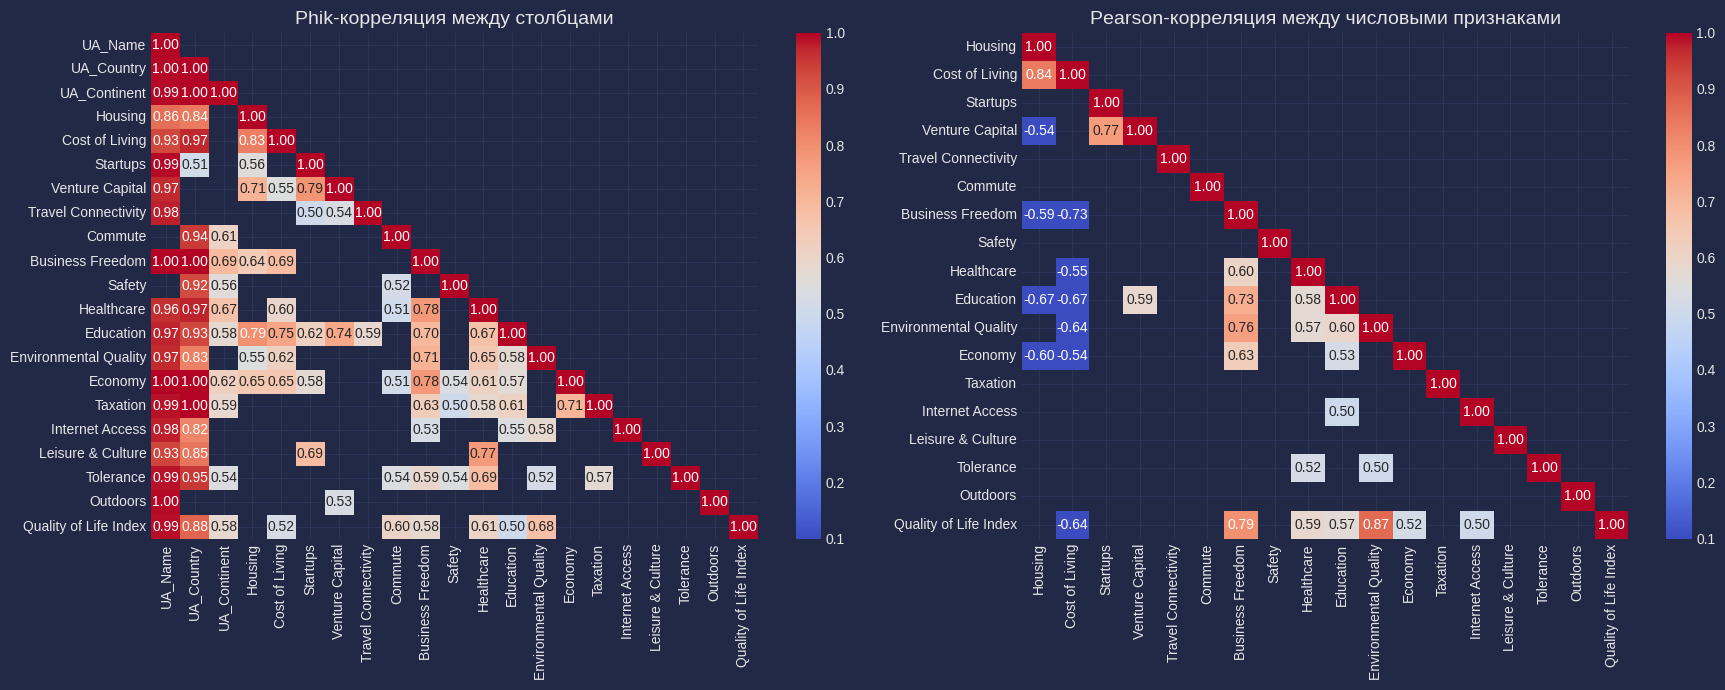

In [13]:
phik_corr = df.phik_matrix()

# Маска и фильтрация слабых значений
mask_phik = np.triu(np.ones_like(phik_corr, dtype=bool), k=1)
phik_corr_filtered = phik_corr.copy()
phik_corr_filtered[phik_corr_filtered < 0.5] = np.nan

# Pearson корреляция для числовых признаков
corr = df[num_cols].corr(method='pearson')

mask_pearson = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_filtered = corr.copy()
corr_filtered[corr_filtered.abs() < 0.5] = np.nan

# Построение двух тепловых карт рядом
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Левая — Phik
sns.heatmap(phik_corr_filtered, mask=mask_phik, annot=True, fmt='.2f',
            cmap='coolwarm', vmin=0.1, vmax=1, ax=axes[0])
axes[0].set_title("Phik-корреляция между столбцами", fontsize=14)

# Правая — Pearson
sns.heatmap(corr_filtered, mask=mask_pearson, annot=True, fmt='.2f',
            cmap='coolwarm', vmin=0.1, vmax=1, ax=axes[1])
axes[1].set_title("Pearson-корреляция между числовыми признаками", fontsize=14)

plt.tight_layout()
plt.show()

In [14]:
if 'UA_Name' in df.columns:
    df.drop(columns=['UA_Name'], inplace=True)
    print("Столбец UA_Name удален.")

Столбец UA_Name удален.


Так будет лучше, чтобы без переобучения

## Основная часть работы

In [15]:
target = "Quality of Life Index"
X = df.drop(columns=[target])
y = df[target]

In [16]:
cat_features = X.select_dtypes(include=['object']).columns.tolist()
cat_features

['UA_Country', 'UA_Continent']

Разбиение исходного датасета на обучающую и тестовую выборки (80% / 20%)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=50
)

In [19]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=50)

Для CatBoost передаем список индексов категориальных признаков относительно обучающей выборки

In [20]:
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]

Функция для оптимизации гиперпараметров через Optuna

In [21]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 200),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'loss_function': 'RMSE',
        'verbose': 0,
        'random_seed': 50
    }
    
    model = CatBoostRegressor(**params)
    
    train_pool = Pool(data=X_train_split, label=y_train_split, cat_features=cat_feature_indices)
    valid_pool = Pool(data=X_val_split, label=y_val_split, cat_features=cat_feature_indices)
    
    model.fit(train_pool, eval_set=valid_pool, early_stopping_rounds=20, verbose=False)
    preds = model.predict(X_val_split)
    mse = mean_squared_error(y_val_split, preds)
    return mse

In [22]:
# 100 испытаний, найдем лучшие параметры
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
print("Лучшие параметры:", study.best_params)

[I 2025-04-15 09:23:56,995] A new study created in memory with name: no-name-9ab93ef4-dea5-4c21-b9a7-2555d8016fe9
[I 2025-04-15 09:23:57,211] Trial 0 finished with value: 339.0663604043773 and parameters: {'iterations': 121, 'learning_rate': 0.1368424494399864, 'depth': 6, 'l2_leaf_reg': 3.1623984326568113}. Best is trial 0 with value: 339.0663604043773.
[I 2025-04-15 09:23:57,833] Trial 1 finished with value: 395.6259130519556 and parameters: {'iterations': 193, 'learning_rate': 0.0902029150100004, 'depth': 9, 'l2_leaf_reg': 1.8637741502787208}. Best is trial 0 with value: 339.0663604043773.
[I 2025-04-15 09:23:58,469] Trial 2 finished with value: 456.68448806047456 and parameters: {'iterations': 92, 'learning_rate': 0.022621947329336704, 'depth': 9, 'l2_leaf_reg': 2.5023074400699428}. Best is trial 0 with value: 339.0663604043773.
[I 2025-04-15 09:23:58,903] Trial 3 finished with value: 447.19210693385344 and parameters: {'iterations': 61, 'learning_rate': 0.0367117106986648, 'depth'

Лучшие параметры: {'iterations': 168, 'learning_rate': 0.22854481730935808, 'depth': 4, 'l2_leaf_reg': 5.638949168778349}


Использование лучших параметров 

In [23]:
best_params = study.best_params.copy()
best_params.update({
    'loss_function': 'RMSE',
    'verbose': 0,
    'random_seed': 50
})

final_model = CatBoostRegressor(**best_params)

In [24]:
train_pool_full = Pool(data=X_train, label=y_train, cat_features=cat_feature_indices)
final_model.fit(train_pool_full, early_stopping_rounds=20, verbose=True)

0:	learn: 30.4303775	total: 1.05ms	remaining: 176ms
1:	learn: 27.7743857	total: 2.13ms	remaining: 177ms
2:	learn: 24.9720097	total: 2.96ms	remaining: 163ms
3:	learn: 22.9772612	total: 3.85ms	remaining: 158ms
4:	learn: 20.9279759	total: 4.63ms	remaining: 151ms
5:	learn: 19.4502750	total: 5.54ms	remaining: 149ms
6:	learn: 18.4193450	total: 6.29ms	remaining: 145ms
7:	learn: 17.6087500	total: 7.04ms	remaining: 141ms
8:	learn: 16.7674443	total: 7.89ms	remaining: 139ms
9:	learn: 16.1705915	total: 8.78ms	remaining: 139ms
10:	learn: 15.3690234	total: 9.49ms	remaining: 135ms
11:	learn: 14.8042899	total: 10.2ms	remaining: 133ms
12:	learn: 14.3296164	total: 10.9ms	remaining: 130ms
13:	learn: 13.7326085	total: 11.7ms	remaining: 128ms
14:	learn: 13.3783979	total: 12.4ms	remaining: 126ms
15:	learn: 13.0042352	total: 13.1ms	remaining: 125ms
16:	learn: 12.7813576	total: 13.8ms	remaining: 123ms
17:	learn: 12.4707643	total: 14.6ms	remaining: 122ms
18:	learn: 12.1739788	total: 15.3ms	remaining: 120ms
19:

In [25]:
test_pool = Pool(data=X_test, cat_features=cat_feature_indices)
preds_test = final_model.predict(test_pool)
final_mse = mean_squared_error(y_test, preds_test)
print('Финальное MSE на тестовой выборке: {:.4f}'.format(final_mse))

Финальное MSE на тестовой выборке: 179.5348
